NMFk Notebook: Blind Source Separation
-----

An example problem demonstrating how **NMFk** can be applied to extract unknown signals or signatures embeded (mixed) in unknown fasion in analyzed datasets.

This type of analysis is frequently called **blind source separation** or **feature extraction**.

Applying **NMFk**, we can automatically:

- identify the number of the unknown mixed signatures in a dataset 
- estimate the shape of the unknown mixed signatures
- estimate how the signatures are mixed at each sensor

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="../../logo/nmfk-logo.png" alt="NMFk" width=20% max-width=125px;/>
</div>

**NMFk** is a code within the [SmartTensors](https://github.com/SmartTensors) framework.

<div style="text-align: left; padding-top: 30px; padding-bottom: 30px;">
    <img src="../../logo/SmartTensorsNewSmall.png" alt="NMFk" width=20% max-width=125px;/>
</div>

If **NMFk** is not installed, first execute in the Julia REPL: `import Pkg; Pkg.add("NMFk"); Pkg.add("Mads")`.

In [1]:
import Revise
import NMFk
import Mads
import Random

Random.seed!(2021)

┌ Info: Precompiling NMFk [e40cd9e2-a1df-5d90-a1fa-603fdc3dbdd8]
└ @ Base loading.jl:1317


Let us generate 3 random signals:

In [ ]:
a = rand(15)
b = rand(15)
c = rand(15)
[a b c]

The singals look like this:

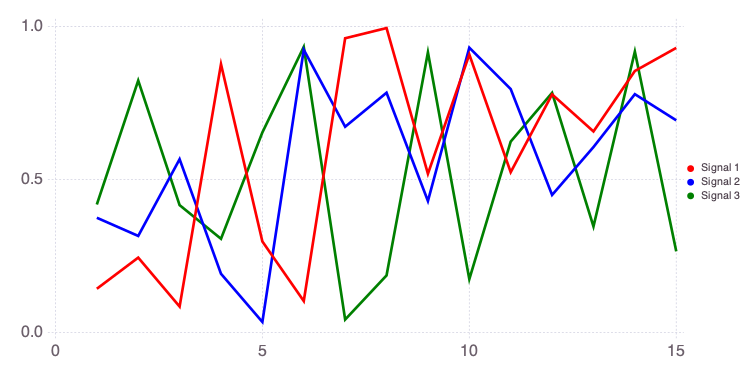

In [ ]:

Mads.plotseries([a b c])

We can collect the 3 signal vectors into a signal matrix `W`:

In [ ]:
W = [a b c]

15×3 Matrix{Float64}:
 0.142528  0.37457    0.417998
 0.244368  0.315157   0.82316
 0.084349  0.566074   0.4159
 0.87666   0.19155    0.305887
 0.297135  0.0340242  0.653658
 0.102301  0.923879   0.933132
 0.961446  0.672256   0.0419137
 0.994825  0.783367   0.186087
 0.518444  0.429427   0.915341
 0.908245  0.930611   0.173948
 0.523605  0.795334   0.623679
 0.777877  0.449229   0.783005
 0.656755  0.605779   0.346222
 0.854471  0.778596   0.917936
 0.92996   0.693078   0.264864

Now we can mix the signals in matrix `W` to produce a data matrix `X` representing data collected at 5 sensors (e.g., measurement devices or wells at different locations).

Each of the 5 sensors is observing some mixture of the signals in `W`.

The way the 3 signals are mixed at the sensors is represented by the mixing matrix `H`.

Let us define the mixing matrix `H` as:

In [ ]:
H = [1 10 0 0 1; 0 1 1 5 2; 3 0 0 1 5]

3×5 Matrix{Int64}:
 1  10  0  0  1
 0   1  1  5  2
 3   0  0  1  5

Each column of the `H` matrix defines how the 3 signals are represented in each sensors.

For example, the first sensor (column 1 above) detects only Signals 1 and 3; Signal 2 is missing because `H[2,1]` is equal to zero.

The second sensor (column 2 above) detects Signals 1 and 2; Signal 3 is missing because `H[3,2]` is equal to zero.

The entries of `H` matrix also define the proportions at which the signals are mixed.

For example, the first sensor (column 1 above) detects Signal 3 times stronger than Signal 1.

The data matrix `X` is formed by multiplying `W` and `H` matrices. `X` defines the actual data observed.

In [ ]:
X = W * H

15×5 Matrix{Float64}:
 1.39652   1.79985  0.37457    2.29085   2.98166
 2.71385   2.75884  0.315157   2.39895   4.99049
 1.33205   1.40956  0.566074   3.24627   3.296
 1.79432   8.95815  0.19155    1.26364   2.78919
 2.25811   3.00538  0.0340242  0.823779  3.63347
 2.9017    1.94689  0.923879   5.55253   6.61572
 1.08719  10.2867   0.672256   3.40319   2.51553
 1.55309  10.7316   0.783367   4.10292   3.492
 3.26447   5.61387  0.429427   3.06248   5.954
 1.43009  10.0131   0.930611   4.827     3.6392
 2.39464   6.03138  0.795334   4.60035   5.23267
 3.12689   8.228    0.449229   3.02915   5.59136
 1.69542   7.17333  0.605779   3.37512   3.59942
 3.60828   9.32331  0.778596   4.81092   7.00134
 1.72455   9.99268  0.693078   3.73025   3.64044

The data matrix `X` looks like this:

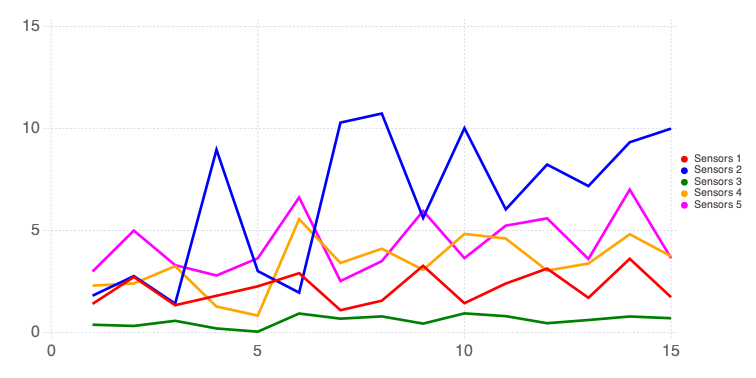

In [ ]:
Mads.plotseries(X; name="Sensors")

Now, we can assume that we only know the data matrix `X` and the `W` and `H` matrices are unknown.

We can execute **NMFk** and analyze the data matrix `X`.

**NMFk** will automatically:

- identify the number of the unknown mixed signals in `X` 
- estimate the shape of the unknown mixed signals (i.e., estimate the entries of `W` matrix)
- estimate how the signals are mixed at the 5 sensors (i.e., estimate the entries of `H` matrix)

This can be done based only on the information in `X`:

In [ ]:
We, He, fitquality, robustness, aic, kopt = NMFk.execute(X, 2:5; save=false, method=:simple);


OF: min 16.543332107387688 max 16.54370333630169 mean 16.543657649186834 std 0.00011732763015242336
Worst correlation by columns: 0.9639027073120046
Worst correlation by rows: 0.02743227869440581
Worst norm by columns: 0.40817234689975457
Worst norm by rows: 0.783687725540016
Signals:  2 Fit:     16.54333 Silhouette:    0.9927216 AIC:    -33.36287

OF: min 3.6205773516030755e-9 max 0.024966294581316016 mean 0.004260857741097067 std 0.008033631111142974
Worst correlation by columns: 0.956744979192939
Worst correlation by rows: 0.07071154036399516
Worst norm by columns: 0.5387264618794112
Worst norm by rows: 0.5664600383452569
Signals:  3 Fit: 3.620577e-09 Silhouette:    0.8026802 AIC:    -1661.559

OF: min 2.9243345186560516e-5 max 0.001015416195548337 mean 0.0003210515459856785 std 0.00031525368737313317
Worst correlation by columns: 0.9566107482444881
Worst correlation by rows: 0.07069962799810608
Worst norm by columns: 0.5886787800802283
Worst norm by rows: 0.716149644115928
Signals

┌ Info: Results
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkExecute.jl:15
┌ Info: Optimal solution: 3 signals
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkExecute.jl:20


**NMFk** returns the estimated optimal number of signals `kopt` which in this case, as expected, is equal to 3.

**NMFk** also returns estimates of matrices `W` and `H`.

Here the estimates of matrices W and H are stored as `We` and `He` objects.

`We[kopt]` and `He[kopt]` are scaled versions of the original `W` and `H` matrices:

In [ ]:
We[kopt]

15×3 Matrix{Float64}:
  1.25937     3.72324     3.86085
  2.51593     2.92553     7.73582
  0.306818    5.76286     3.78028
 10.7111      1.42971     2.85602
  3.54325     1.70449e-9  6.21152
  1.33202e-7  9.35074     8.58998
 11.2749      6.49663     0.193308
 11.5323      7.60014     1.53054
  5.80211     3.94336     8.57877
 10.2771      9.19473     1.36816
  5.50639     7.85983     5.68814
  9.06469     4.04517     7.31478
  7.46018     5.88067     3.10823
  9.61252     7.41424     8.49568
 10.8056      6.66714     2.30821

In [ ]:
He[kopt]

3×5 Matrix{Float64}:
 0.0803405  0.805002   0.00425469  0.0213696  0.0890334
 0.0184625  0.185572   0.0960015   0.48317    0.216794
 0.317705   0.0246405  0.00305093  0.120433   0.534171

Note that the order of columns ('signals') in `W` and `We[kopt]` are not expected to match.

Also note that the order of rows ('sensors') in `H` and `He[kopt]` are also not expected to match.

The estimated order of 'signals' will be different every time the code is executed.

Below are plots providing comparisons between the original and estimated `W` an `H` matrices.


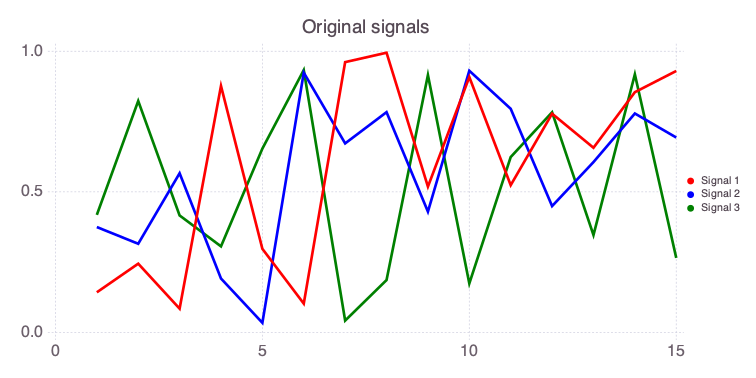

In [ ]:
Mads.plotseries(W; title="Original signals")

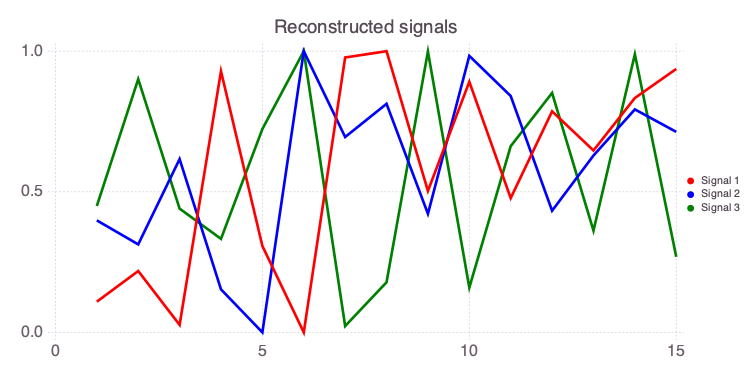

In [ ]:
Mads.plotseries(We[kopt] ./ maximum(We[kopt]; dims=1); title="Reconstructed signals")

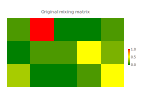

In [ ]:
NMFk.plotmatrix(H ./ maximum(H; dims=2); title="Original mixing matrix")

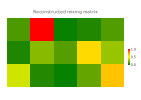

In [ ]:
NMFk.plotmatrix(He[kopt] ./ maximum(He[kopt]; dims=2); title="Reconstructed mixing matrix")